In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats

In [2]:
data_dir = 'data/'

In [3]:
df = pd.read_json(f'{data_dir}/train_features_1.jsonl',lines=True)

In [5]:
df.head()

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
0,2ef9a92ee6c955364564b0df75ee3753473014b2ba162b...,7e39aeea7bc21d16b8652516a150b282,2018-01,1,sivis,"[60782, 5895, 2020, 1487, 2075, 1367, 1145, 85...","[24434, 11, 18, 5, 9, 8, 35, 21, 3, 4, 8, 4, 2...","{'numstrings': 3863, 'avlength': 17.6435412891...","{'size': 349811, 'vsize': 28672, 'has_debug': ...","{'coff': {'timestamp': 1301832471, 'machine': ...","{'entry': '.code', 'sections': [{'name': '.cod...","{'MSVCRT.dll': ['memset', 'memcpy', '_stricmp'...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
1,50f3f85a10cedf9192f7aa4cd4d2b1ce9e294e23f3dd7e...,09435239e7a0ddfeb78820cf5c31cc06,2018-01,-1,upatre,"[11971, 74, 27, 147, 61, 61, 19, 27, 53, 34, 1...","[2006, 2, 3, 0, 4, 3, 3, 1, 9, 1, 3, 0, 1, 2, ...","{'numstrings': 82, 'avlength': 11.097560975609...","{'size': 33776, 'vsize': 36864, 'has_debug': 0...","{'coff': {'timestamp': 1401281511, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'kernel32.dll': ['Sleep', 'VirtualAlloc', 'Si...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
2,f6c68207b3b395feabcbb029c393607db4ff5227ecd5da...,744cac35cdfa2c3a0672184d433cb93e,2018-01,0,,"[35534, 3516, 1832, 870, 957, 596, 435, 501, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 1452, 'avlength': 15.4869146005...","{'size': 161280, 'vsize': 184320, 'has_debug':...","{'coff': {'timestamp': 1512336134, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'WrldFlsh.exe': ['pszStatName', 'dbWeather1',...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
3,3292ee48fac44b7b70bdfde526f71c09e65764d9b582f5...,b6d6f2dc5ef191e23dfc2892ff626168,2018-01,0,,"[3389, 100, 35, 9, 18, 7, 16, 12, 12, 7, 28, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 65, 'avlength': 20.030769230769...","{'size': 6144, 'vsize': 32768, 'has_debug': 0,...","{'coff': {'timestamp': 1499089577, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...",{'mscoree.dll': ['_CorExeMain']},[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
4,b9494c218b74a9774a88307ba83c03da0bee3a80899b47...,b6607d4123b0d3afdbca4bdc9a4bcf7a,2018-01,-1,startsurf,"[256325, 3576, 3209, 3073, 3900, 2695, 2711, 2...","[329804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{'numstrings': 5970, 'avlength': 23.8986599664...","{'size': 1242112, 'vsize': 1265664, 'has_debug...","{'coff': {'timestamp': 1515165337, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['CreateEventA', 'CloseHandle...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."


In [38]:
df['max_prob'] = df.byteentropy.apply(lambda x: np.array(x).max()/np.array(x).sum())
df['max_prob'].describe()
df['byte_entropy_val'] = df.byteentropy.apply(lambda x: stats.entropy(np.array(x)))

In [46]:

fig = px.histogram(df, x="max_entropy", color="label", marginal="box", hover_data=df.columns)
fig.show()

In [38]:
# plot histogram of a with plotly using dark theme
fig = px.histogram(x=a,nbins=50,template='plotly_dark')
fig.show()

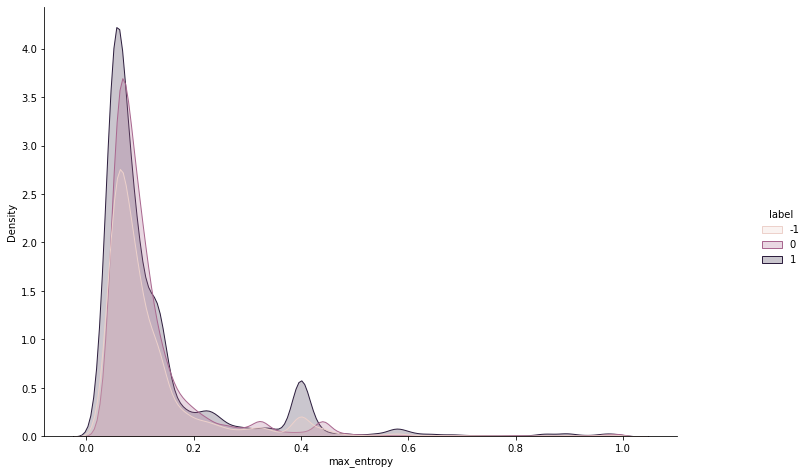

In [41]:
# plot histogram of max_entropy by label with seaborn
a = sns.displot(df, x="max_prob", hue="label", kind="kde", fill=True)

# a = sns.displot(df, x="max_entropy", hue="label", kind="kde", fill=True,
#                 palette=["#8DE4FF", "#8AEA92", "#DEB986"])

# change figure size
a.fig.set_size_inches(12,7)
# plt.fig.set_size_inches(10,5)

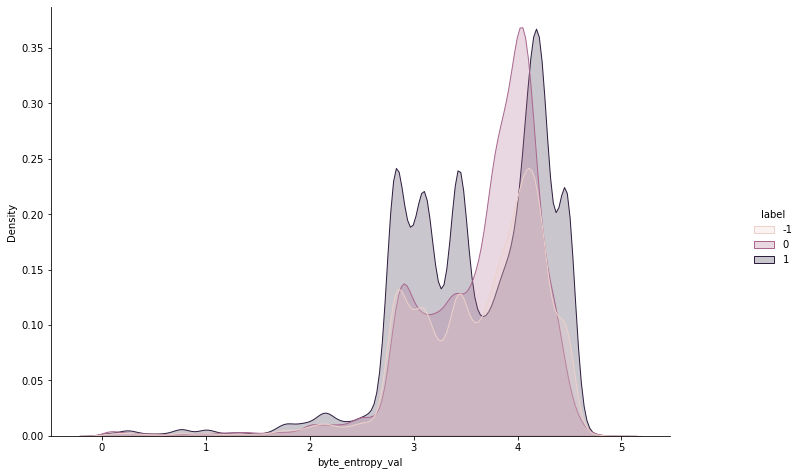

In [44]:
a = sns.displot(df, x="byte_entropy_val", hue="label", kind="kde", fill=True)
a.fig.set_size_inches(12,7)

In [50]:
# flatten strings and general columns data into new dataframe
metadata_columns = ['sha256', 'md5', 'appeared', 'label', 'avclass']
df_general = pd.concat([df.drop(['general'], axis=1)[metadata_columns], df['general'].apply(pd.Series)], axis=1)
df_strings = pd.concat([df_general, df['strings'].apply(pd.Series)], axis=1)

df_strings.head()

,sha256,md5,appeared,label,avclass,size,vsize,has_debug,exports,imports,...,symbols,numstrings,avlength,printabledist,printables,entropy,paths,urls,registry,MZ
0,2ef9a92ee6c955364564b0df75ee3753473014b2ba162b...,7e39aeea7bc21d16b8652516a150b282,2018-01,1,sivis,349811,28672,0,0,55,...,0,3863,17.643541,"[7399, 89, 373, 105, 116, 114, 101, 94, 430, 4...",68157,5.683164,6,22,0,7
1,50f3f85a10cedf9192f7aa4cd4d2b1ce9e294e23f3dd7e...,09435239e7a0ddfeb78820cf5c31cc06,2018-01,-1,upatre,33776,36864,0,0,33,...,0,82,11.097561,"[23, 3, 0, 2, 2, 0, 1, 1, 0, 0, 3, 3, 2, 5, 12...",910,5.454550,0,0,0,2
2,f6c68207b3b395feabcbb029c393607db4ff5227ecd5da...,744cac35cdfa2c3a0672184d433cb93e,2018-01,0,,161280,184320,0,0,155,...,0,1452,15.486915,"[844, 28, 94, 26, 36, 51, 77, 27, 37, 31, 14, ...",22487,5.668189,0,204,0,2
3,3292ee48fac44b7b70bdfde526f71c09e65764d9b582f5...,b6d6f2dc5ef191e23dfc2892ff626168,2018-01,0,,6144,32768,0,0,1,...,0,65,20.030769,"[58, 1, 22, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 3...",1302,5.111368,0,0,0,1
4,b9494c218b74a9774a88307ba83c03da0bee3a80899b47...,b6607d4123b0d3afdbca4bdc9a4bcf7a,2018-01,-1,startsurf,1242112,1265664,1,0,85,...,0,5970,23.898660,"[811, 428, 531, 579, 693, 717, 766, 942, 981, ...",142675,6.384166,0,0,0,35


In [49]:
t_df = df.iloc[:1000]
norm_df = pd.json_normalize(t_df[['general','strings']])
norm_df.head()

AttributeError: 'str' object has no attribute 'values'

In [54]:
df.iloc[2]['section']

{'entry': '.text',
 'sections': [{'name': '.text',
   'size': 103424,
   'entropy': 6.680143962077214,
   'vsize': 103066,
   'props': ['CNT_CODE', 'MEM_EXECUTE', 'MEM_READ']},
  {'name': '.rdata',
   'size': 20992,
   'entropy': 5.619611663752287,
   'vsize': 20710,
   'props': ['CNT_INITIALIZED_DATA', 'MEM_READ']},
  {'name': '.data',
   'size': 25088,
   'entropy': 3.028531057133172,
   'vsize': 33512,
   'props': ['CNT_INITIALIZED_DATA', 'MEM_READ', 'MEM_WRITE']},
  {'name': '.rsrc',
   'size': 2560,
   'entropy': 3.830881802428471,
   'vsize': 2264,
   'props': ['CNT_INITIALIZED_DATA', 'MEM_READ']},
  {'name': '.reloc',
   'size': 8192,
   'entropy': 5.782244559175467,
   'vsize': 7906,
   'props': ['CNT_INITIALIZED_DATA', 'MEM_DISCARDABLE', 'MEM_READ']}]}